In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df = dataset.sample(frac = 1).reset_index()

**Here shuffelling the data rows because all one's output arranged at the first and zero's at the end therefor the model will not trained on the one's output when i split the data**

In [7]:
df.head()

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
1,82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
2,103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
3,201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
4,115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1


In [8]:
df.drop(['index'] , axis = 1 , inplace=True)

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
1,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
2,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
3,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
4,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1


In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
21,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
df.drop_duplicates(inplace = True)

Text(0, 0.5, 'count')

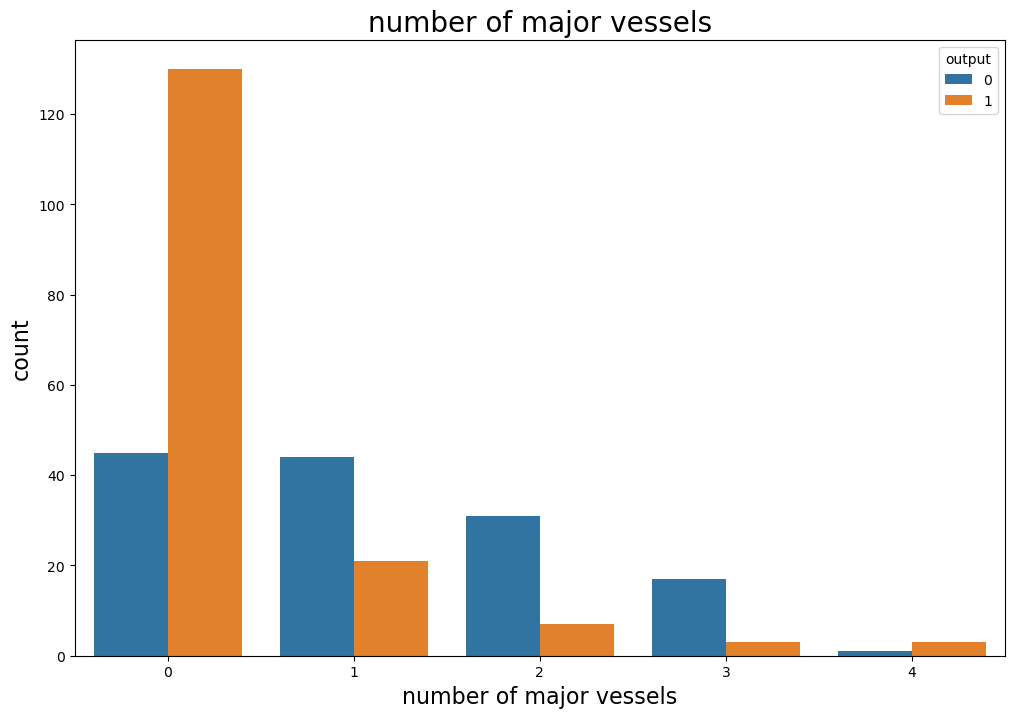

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(data = df ,x = 'caa' , hue = 'output')
plt.title('number of major vessels' , size = 20)
plt.xlabel('number of major vessels' , size = 16)
plt.ylabel('count' , size = 16)

**the chance of heart attack increase when people have 0 number of major vessels**

Text(0, 0.5, 'count')

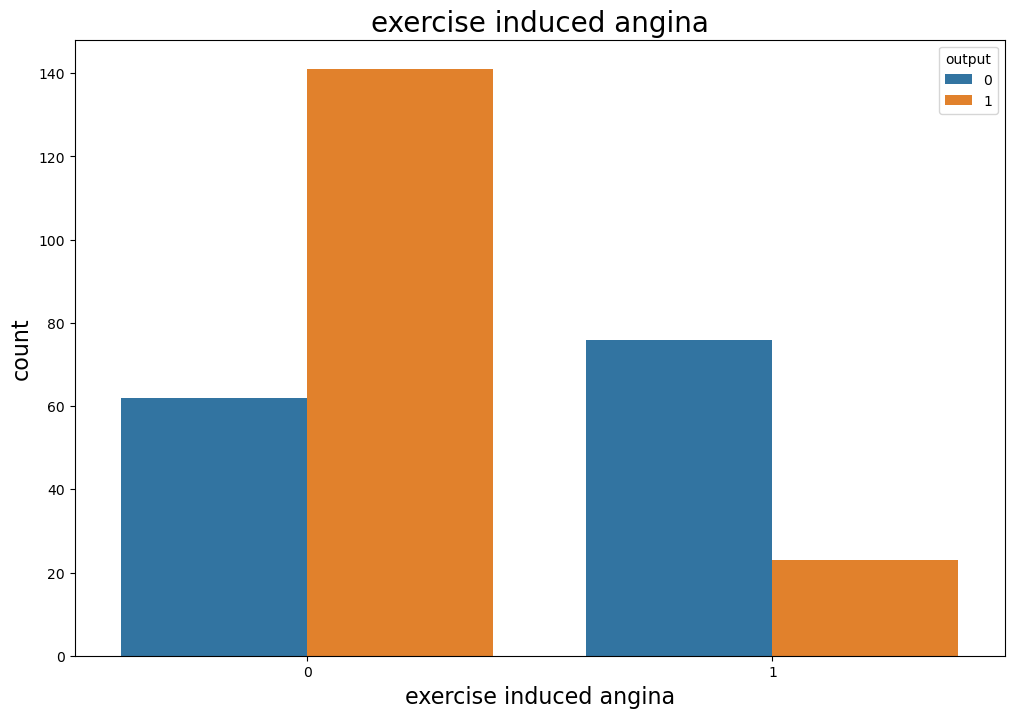

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'exng' , hue = 'output' , data = df)
plt.title('exercise induced angina' , size = 20)
plt.xlabel('exercise induced angina' , size = 16)
plt.ylabel('count' , size = 16)

***the chance of heart attack increase when people don't have exercise induced angina***

Text(0, 0.5, 'count')

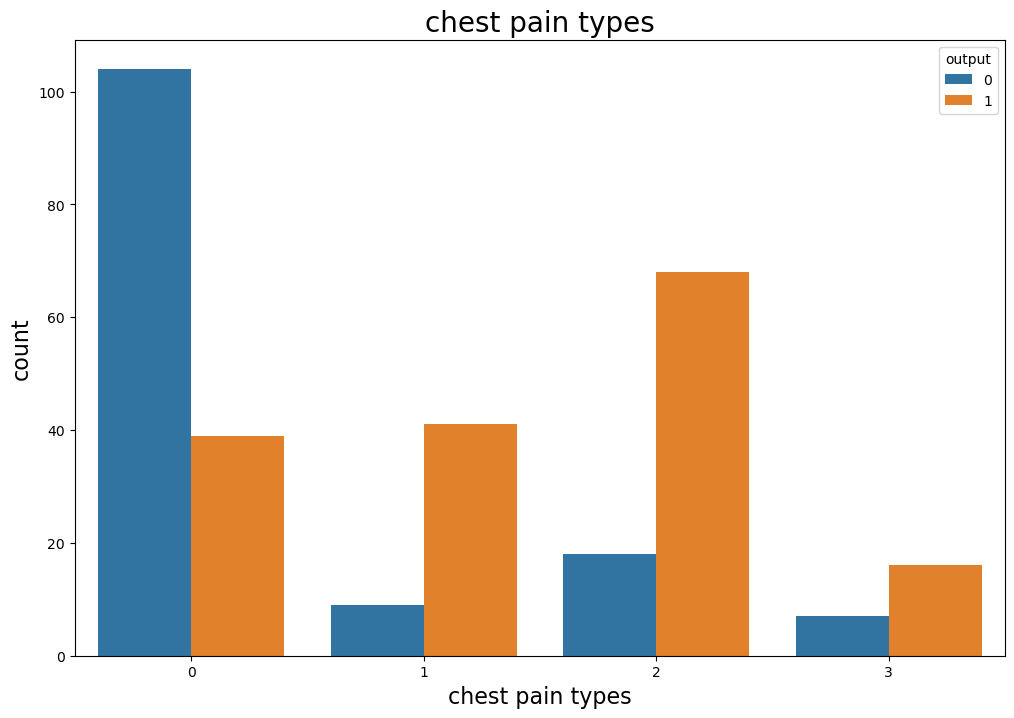

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='cp' , hue = 'output' , data = df)
plt.title('chest pain types' , size = 20)
plt.xlabel('chest pain types' , size = 16)
plt.ylabel('count' , size = 16)

Text(0, 0.5, 'count')

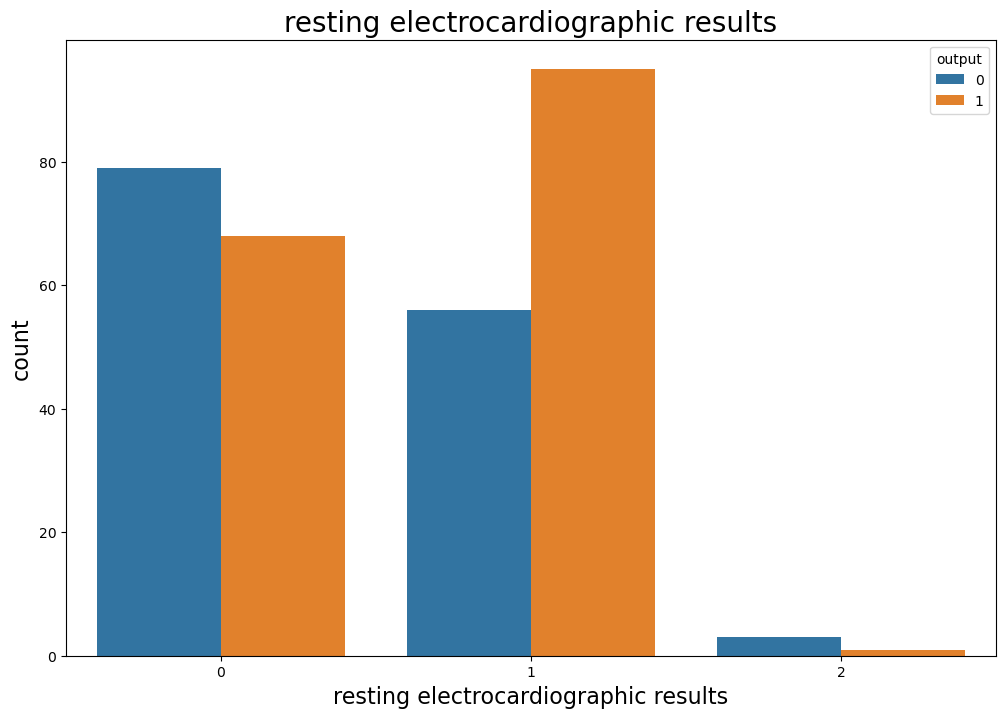

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='restecg' , hue = 'output' , data = df)
plt.title('resting electrocardiographic results' , size = 20)
plt.xlabel('resting electrocardiographic results' , size = 16)
plt.ylabel('count' , size = 16)

Text(0, 0.5, 'count')

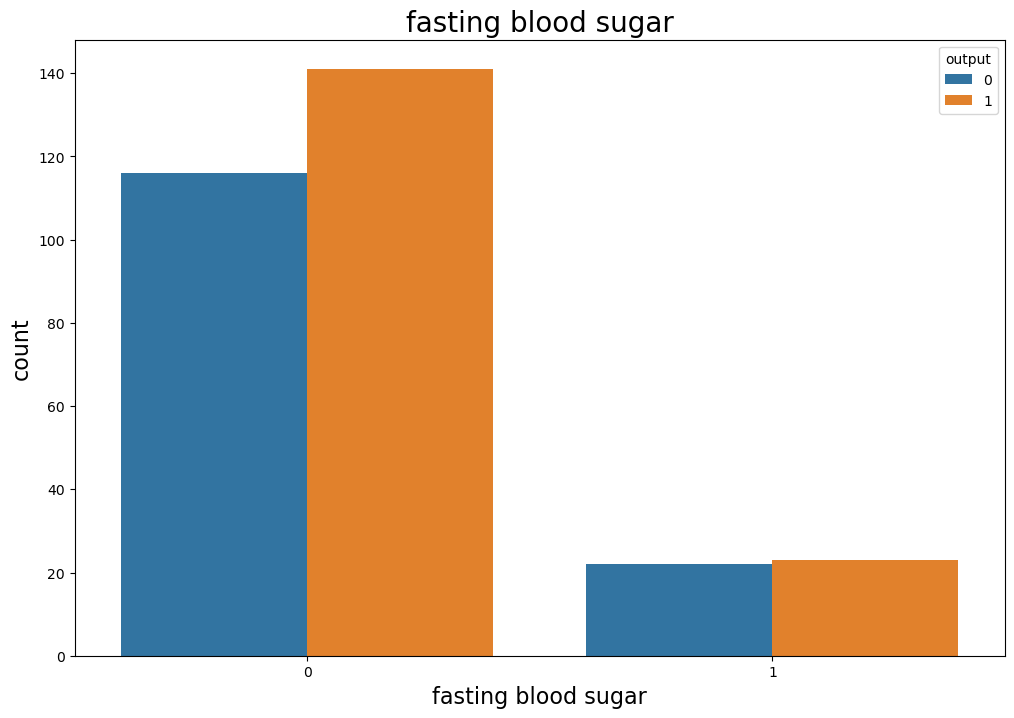

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='fbs' , hue = 'output' , data = df)
plt.title('fasting blood sugar' , size = 20)
plt.xlabel('fasting blood sugar' , size = 16)
plt.ylabel('count' , size = 16)

Text(0, 0.5, 'count')

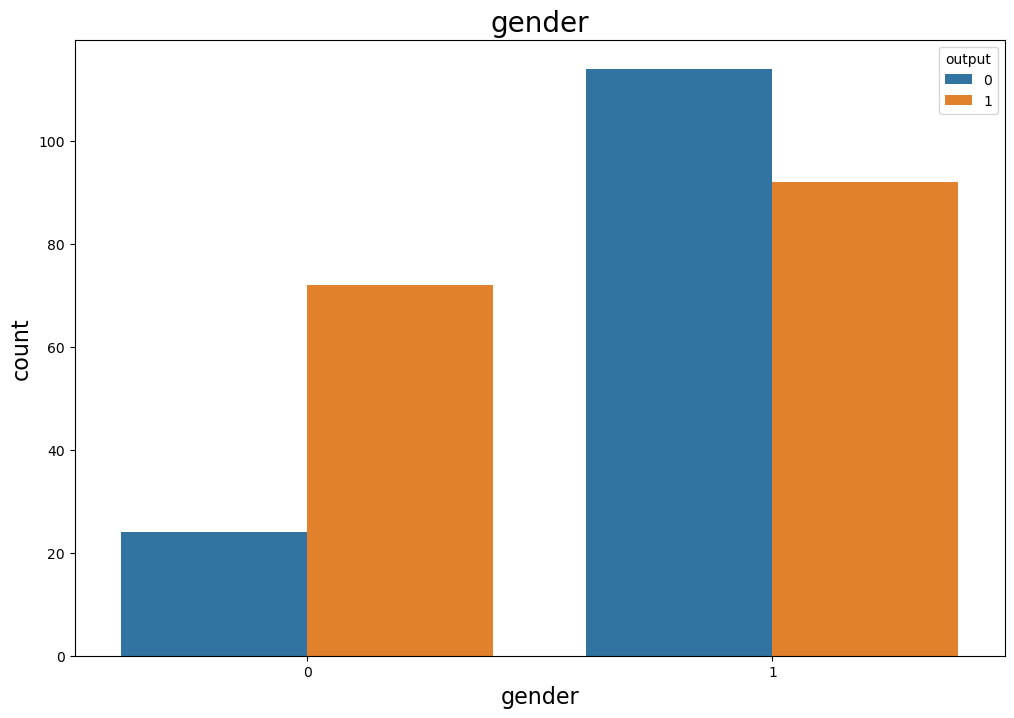

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='sex' , hue = 'output' , data = df)
plt.title('gender' , size = 20)
plt.xlabel('gender' , size = 16)
plt.ylabel('count' , size = 16)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0, 0.5, 'count')

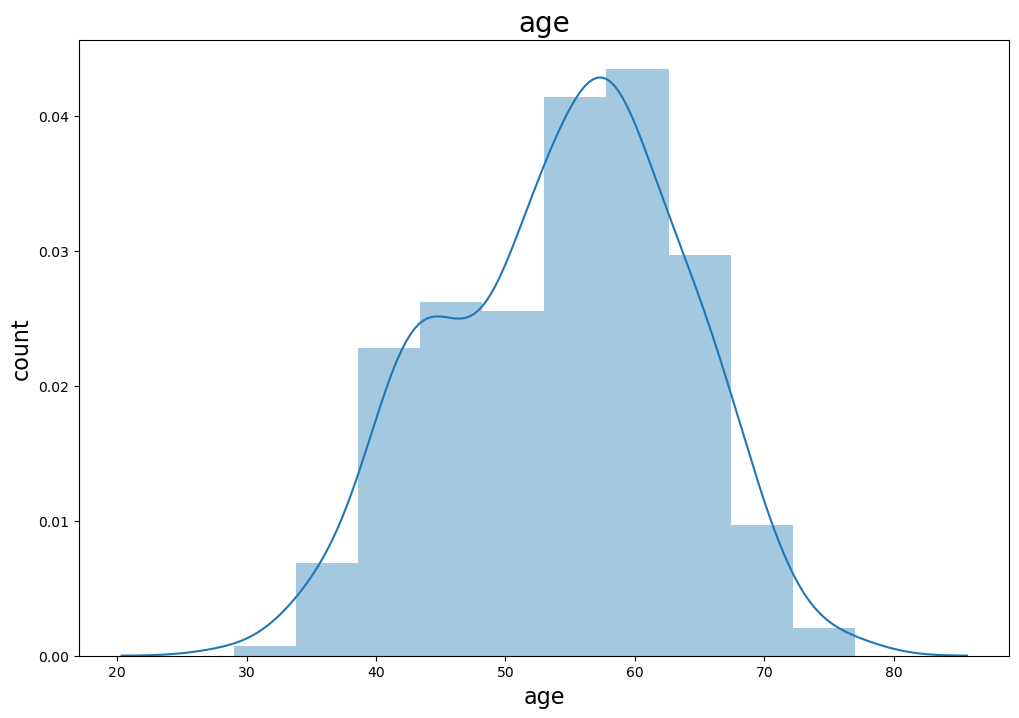

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(x = df['age'] ,bins = 10)
plt.title('age' , size = 20)
plt.xlabel('age' , size = 16)
plt.ylabel('count' , size = 16)

***people with age between 35 to 65 having more chance of heart attack*******

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0, 0.5, 'count')

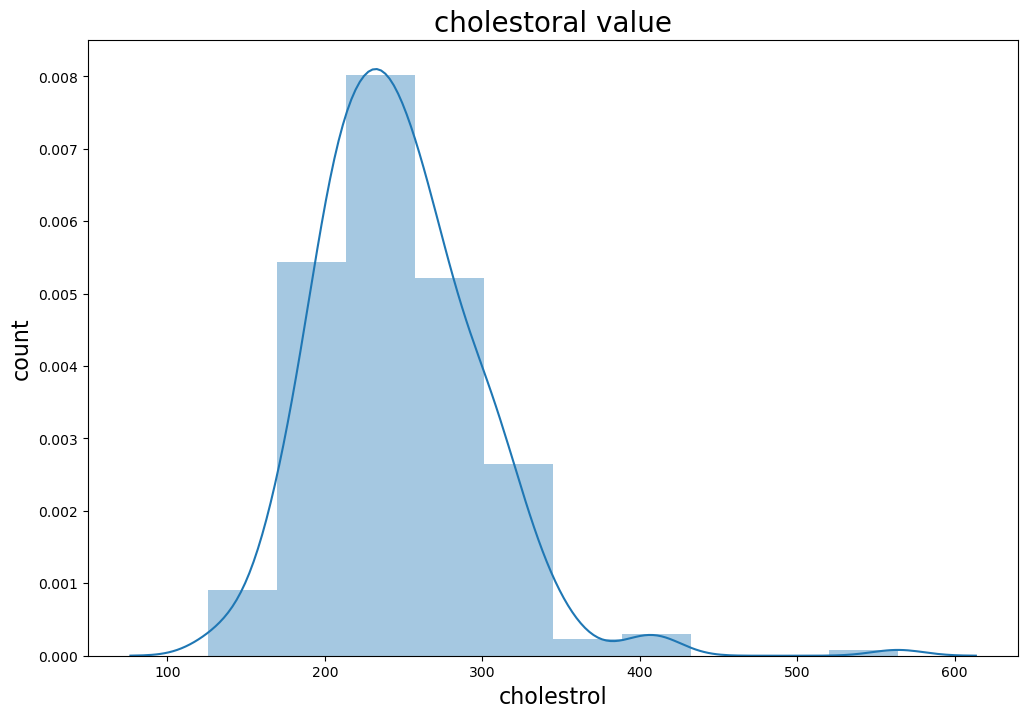

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(x = df['chol'] ,bins = 10)
plt.title('cholestoral value' , size = 20)
plt.xlabel('cholestrol' , size = 16)
plt.ylabel('count' , size = 16)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0, 0.5, 'count')

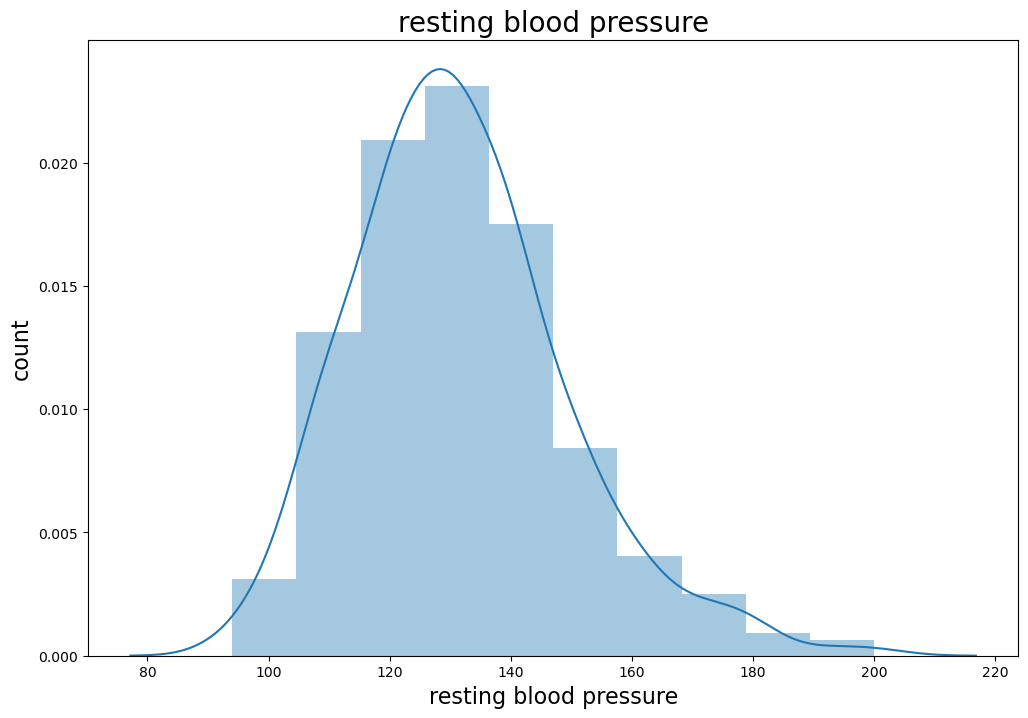

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(x = df['trtbps'] ,bins = 10)
plt.title('resting blood pressure' , size = 20)
plt.xlabel('resting blood pressure' , size = 16)
plt.ylabel('count' , size = 16)

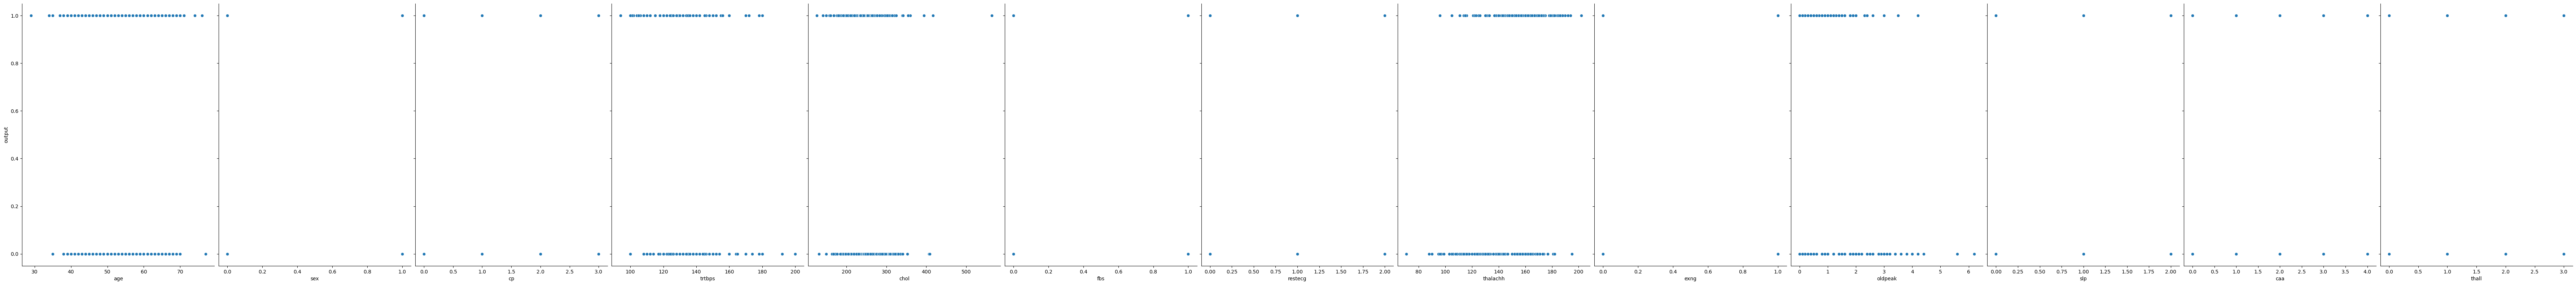

In [23]:
sns.pairplot(df,x_vars=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
'exng', 'oldpeak', 'slp', 'caa', 'thall'], y_vars='output', height= 8, aspect= 0.7, kind= 'scatter')

In [24]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

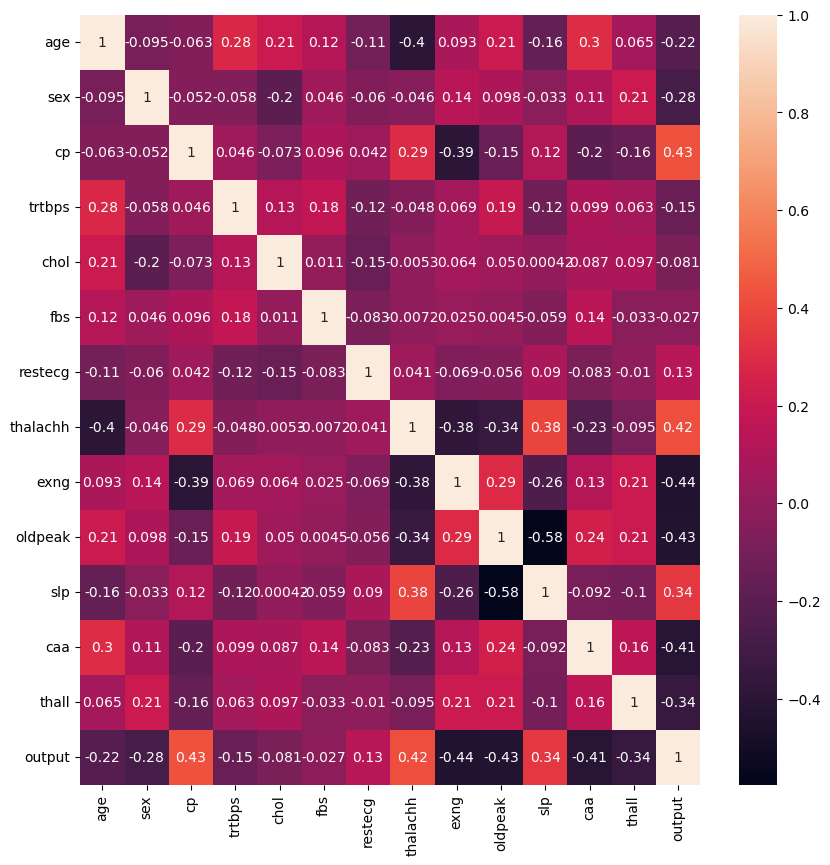

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [26]:
X = df[['cp', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df['output']

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 )

In [28]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [31]:
confusion = confusion_matrix(y_test , y_pred)
print(confusion)
accuracy_score(y_test,y_pred)

[[22  5]
 [ 2 32]]


0.8852459016393442

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [33]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.17 %
Standard Deviation: 4.54 %
